In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('num_booking_status.csv')
data.keys()
print(len(data.keys()))

19


In [3]:
attr_size = len(data.keys())
attr_name = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0


In [4]:
for i in attr_name:
    print(f'{i}: ', set(data[i]))

no_of_adults:  {0, 1, 2, 3, 4}
no_of_children:  {0, 1, 2, 3, 9, 10}
no_of_weekend_nights:  {0, 1, 2, 3, 4, 5, 6}
no_of_week_nights:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
type_of_meal_plan:  {'Meal Plan 2', 'Meal Plan 3', 'Not Selected', 'Meal Plan 1'}
required_car_parking_space:  {0, 1}
room_type_reserved:  {'Room_Type 1', 'Room_Type 7', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 3', 'Room_Type 5'}
lead_time:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 1

- no_of_adults: 성인의 수
- no_of_children: 어린이의 수
- no_of_weekend_nights: 토요일 또는 일요일 밤에 호텔에 머무르거나 예약한 밤의 수
- no_of_week_nights: 월요일부터 금요일까지 호텔에 머무르거나 예약한 밤의 수
- type_of_meal_plan: 고객이 예약한 식사 계획 유형
- required_car_parking_space: 고객이 차량 주차 공간이 필요한지 여부 (0 - 아니오, 1- 예)
- room_type_reserved: 고객이 예약한 방 유형. 값은 INN 호텔에 의해 암호화됨.
- lead_time: 예약일과 도착일 사이의 일 수
- arrival_year: 도착 날짜의 연도
- arrival_month: 도착 날짜의 월
- arrival_date: 월의 날짜
- market_segment_type: 예약처 유형
- repeated_guest: 고객이 반복 고객인지 여부 (0 - 아니오, 1- 예)
- no_of_previous_cancellations: 현재 예약 이전에 고객이 취소한 이전 예약의 수
- no_of_previous_bookings_not_canceled: 현재 예약 이전에 취소되지 않은 이전 예약의 수
- avg_price_per_room: 예약당 평균 객실 가격; 객실 가격은 동적입니다. (유로)
- no_of_special_requests: 고객이 요청한 특별 요청의 총 수 (높은 층, 방에서의 전망 등)
- booking_status: 예약이 취소되었는지 여부

<AxesSubplot:>

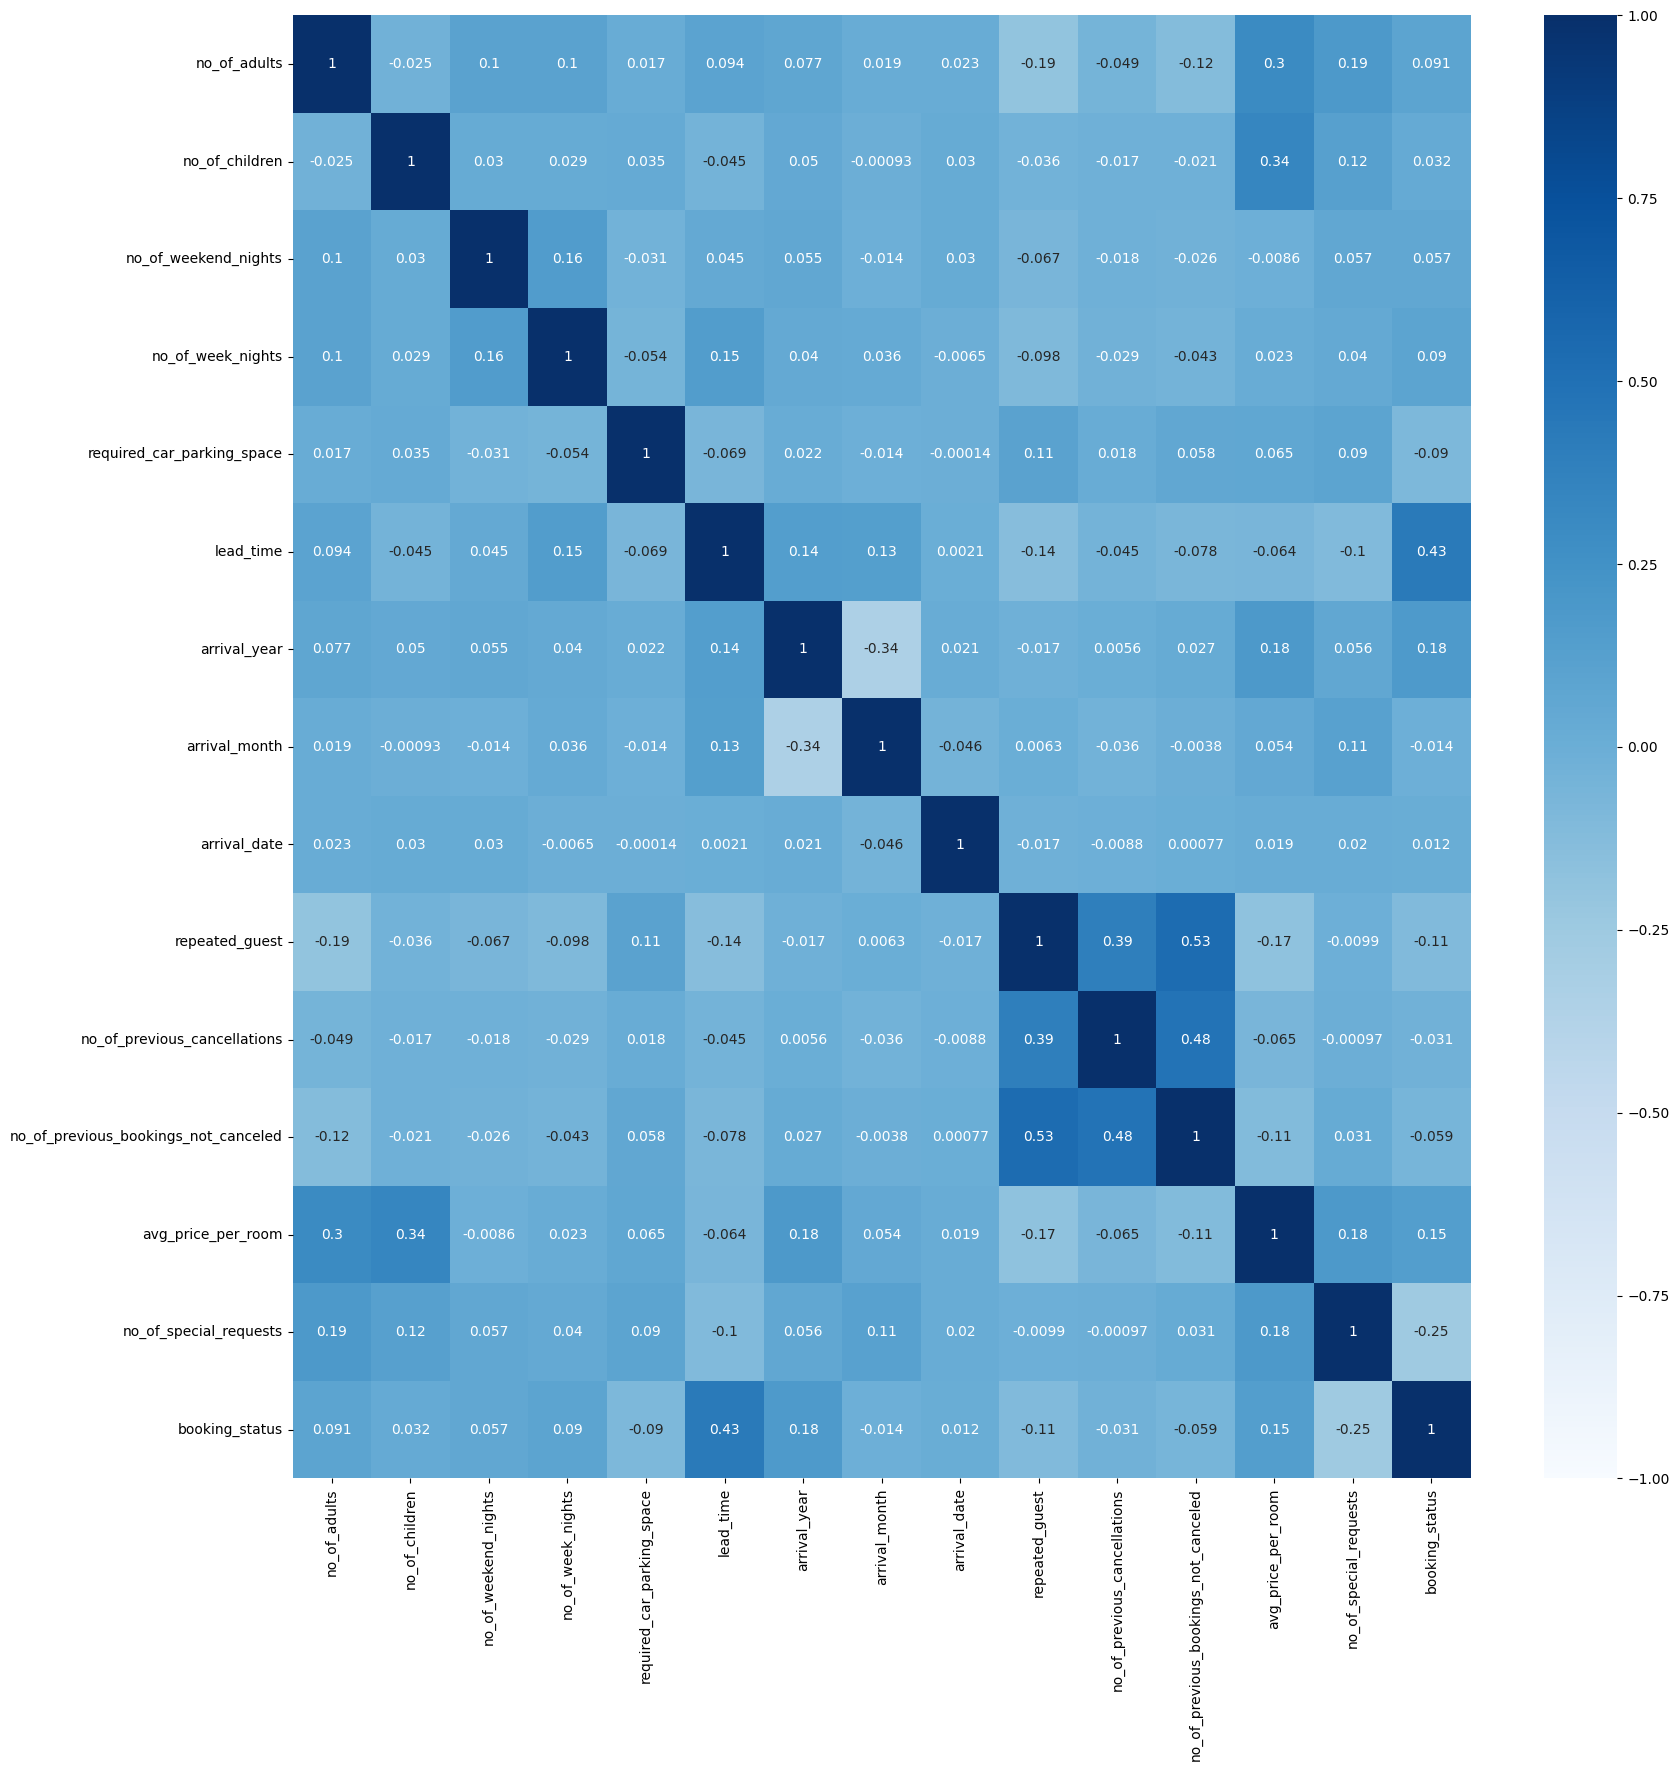

In [12]:
plt.rcParams["figure.figsize"] = (attr_size, attr_size)
sb.heatmap(data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1, #컬러차트 영역 -1 ~ +1
          )

In [ ]:
# lead_time: 예약일과 도착일 사이의 일수
# no_of_previous_bookings_not_canceled

In [ ]:
# 빈도수 세기

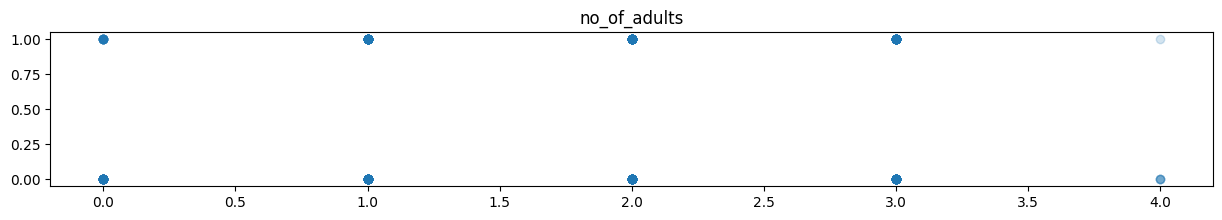

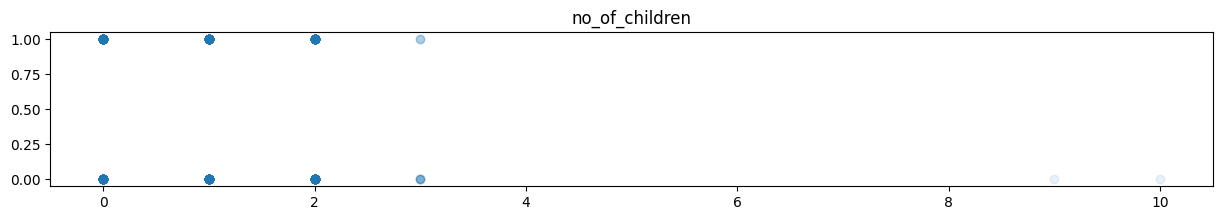

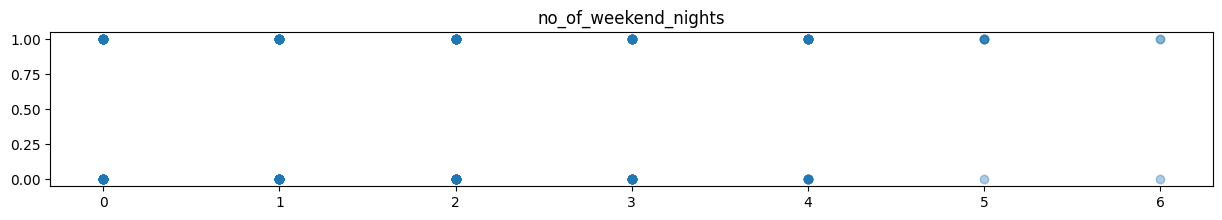

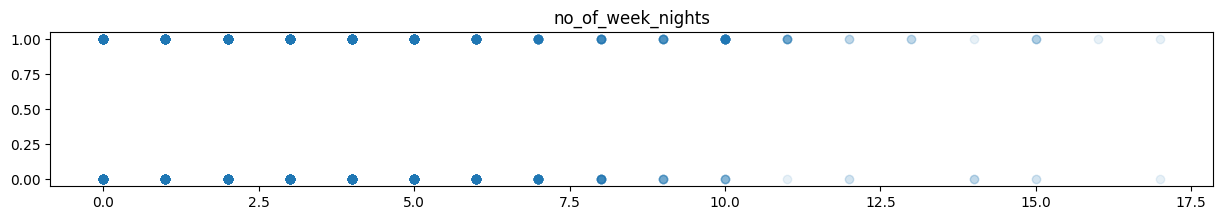

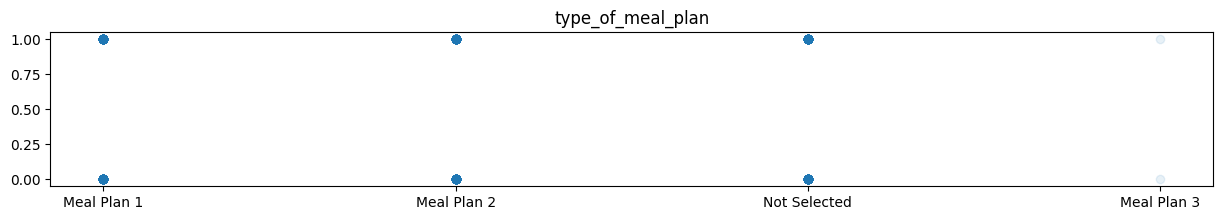

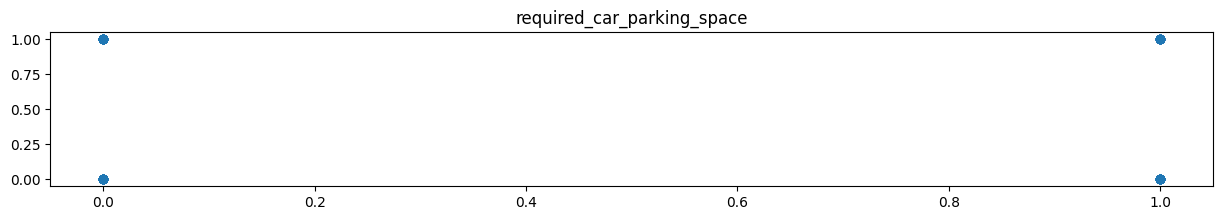

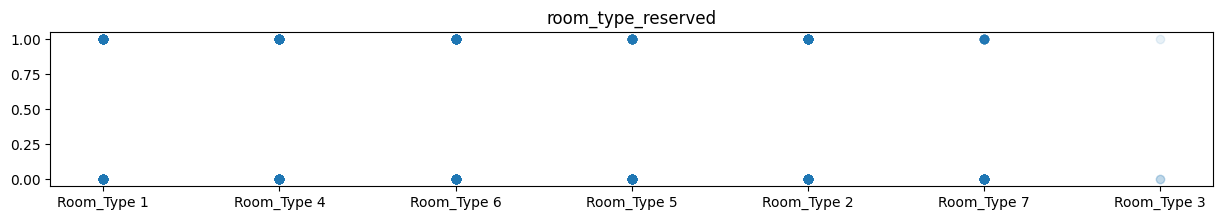

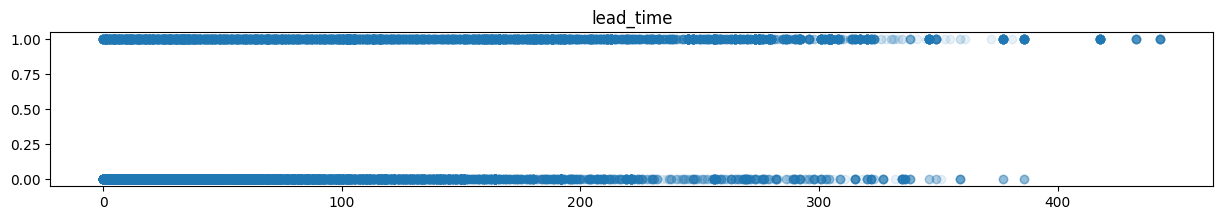

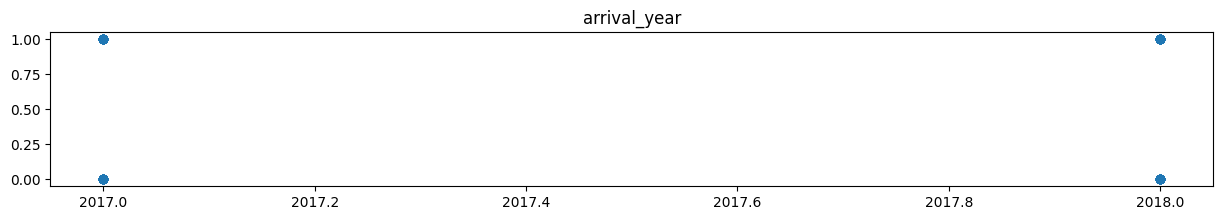

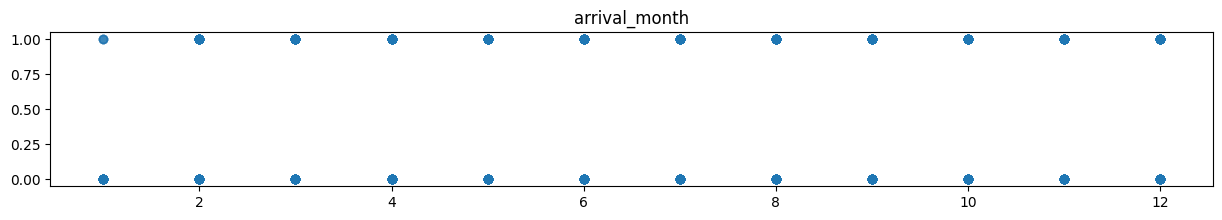

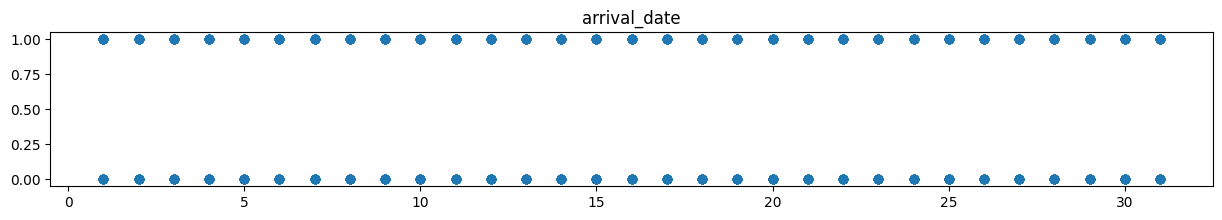

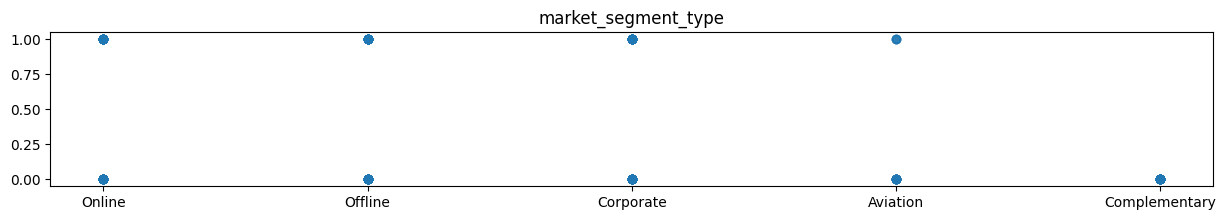

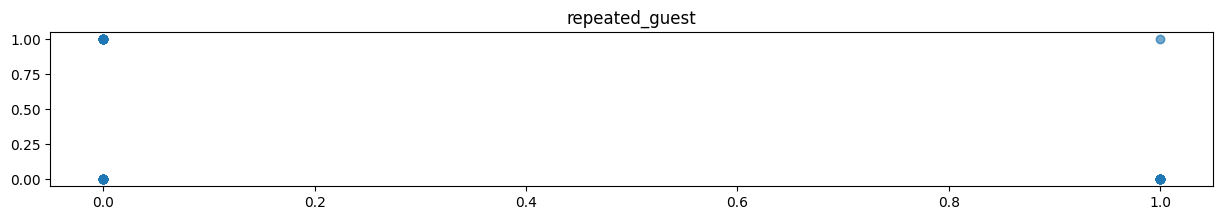

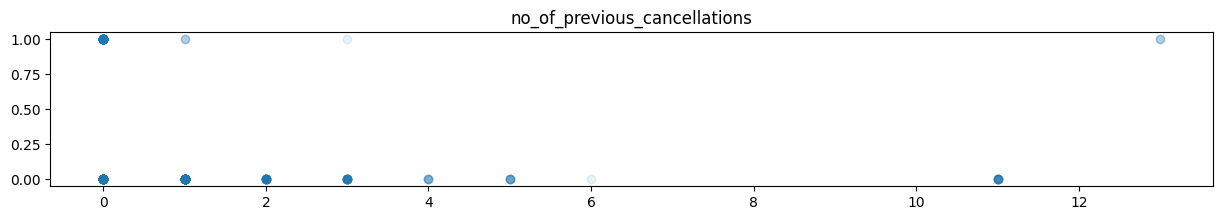

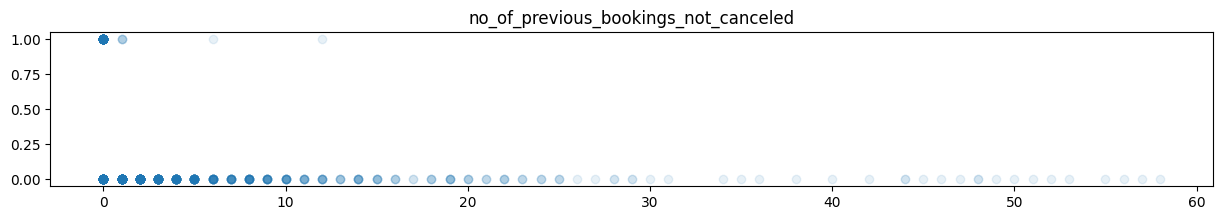

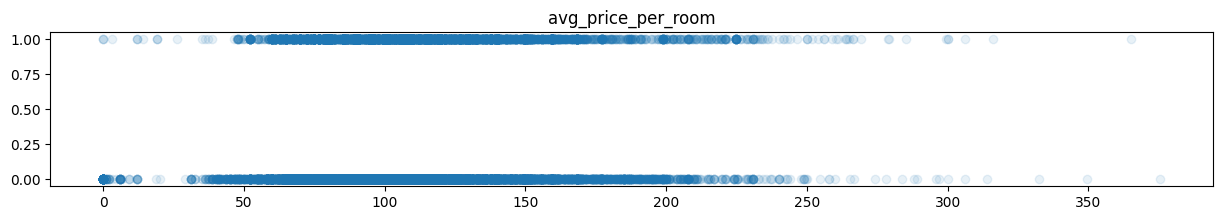

In [27]:
X_attr = attr_name[0:len(attr_name) - 2]
y_attr = 'booking_status'

for i in range(len(X_attr)):
    plt.figure(figsize=(15, 2))
    plt.scatter(data[X_attr[i]], data[y_attr], alpha=0.1)
    plt.title(X_attr[i])
    plt.show()
# 위 아래 반반 => 딱히...?


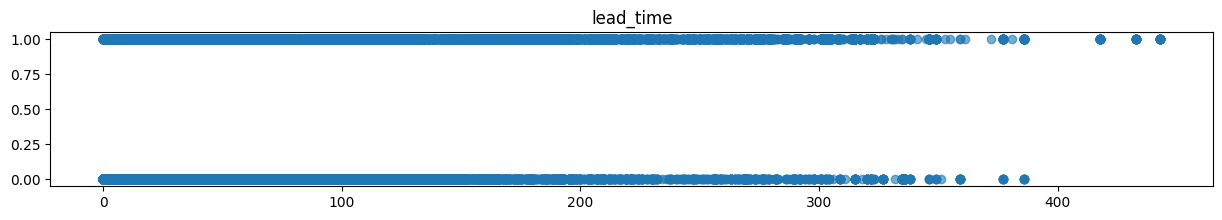

In [24]:
plt.figure(figsize=(15, 2))
plt.scatter(data['lead_time'], data['booking_status'], alpha=0.6)
plt.title('lead_time')
plt.show()    

<AxesSubplot:>

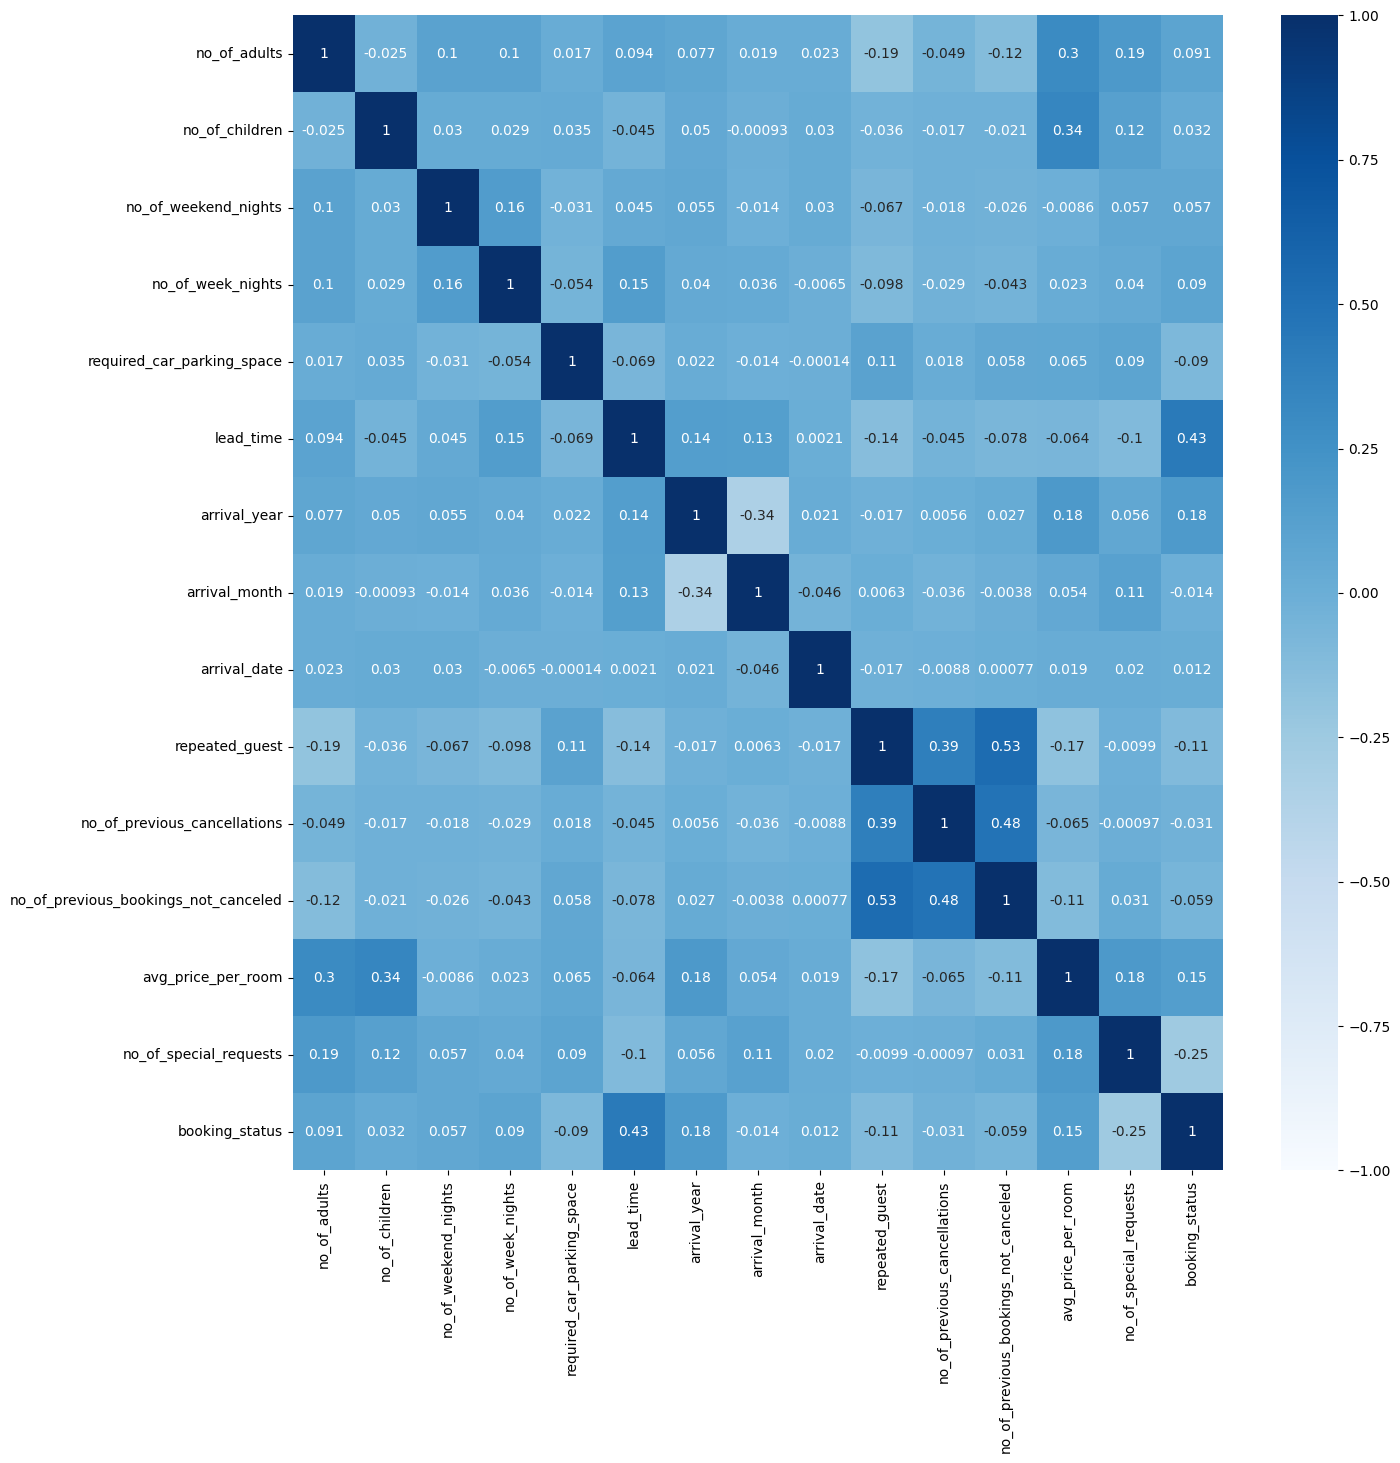

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data = pd.read_csv('train.csv')
# cate -> num: canceled: 1, not canceled: 0
booking_status = {
    "Canceled": 1,
    "Not_Canceled": 0
}
data['booking_status'] = data['booking_status'].map(booking_status)
plt.rcParams["figure.figsize"] = (15, 15)
sb.heatmap(data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1, #컬러차트 영역 -1 ~ +1
          )

In [4]:
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4'],
      dtype='object')

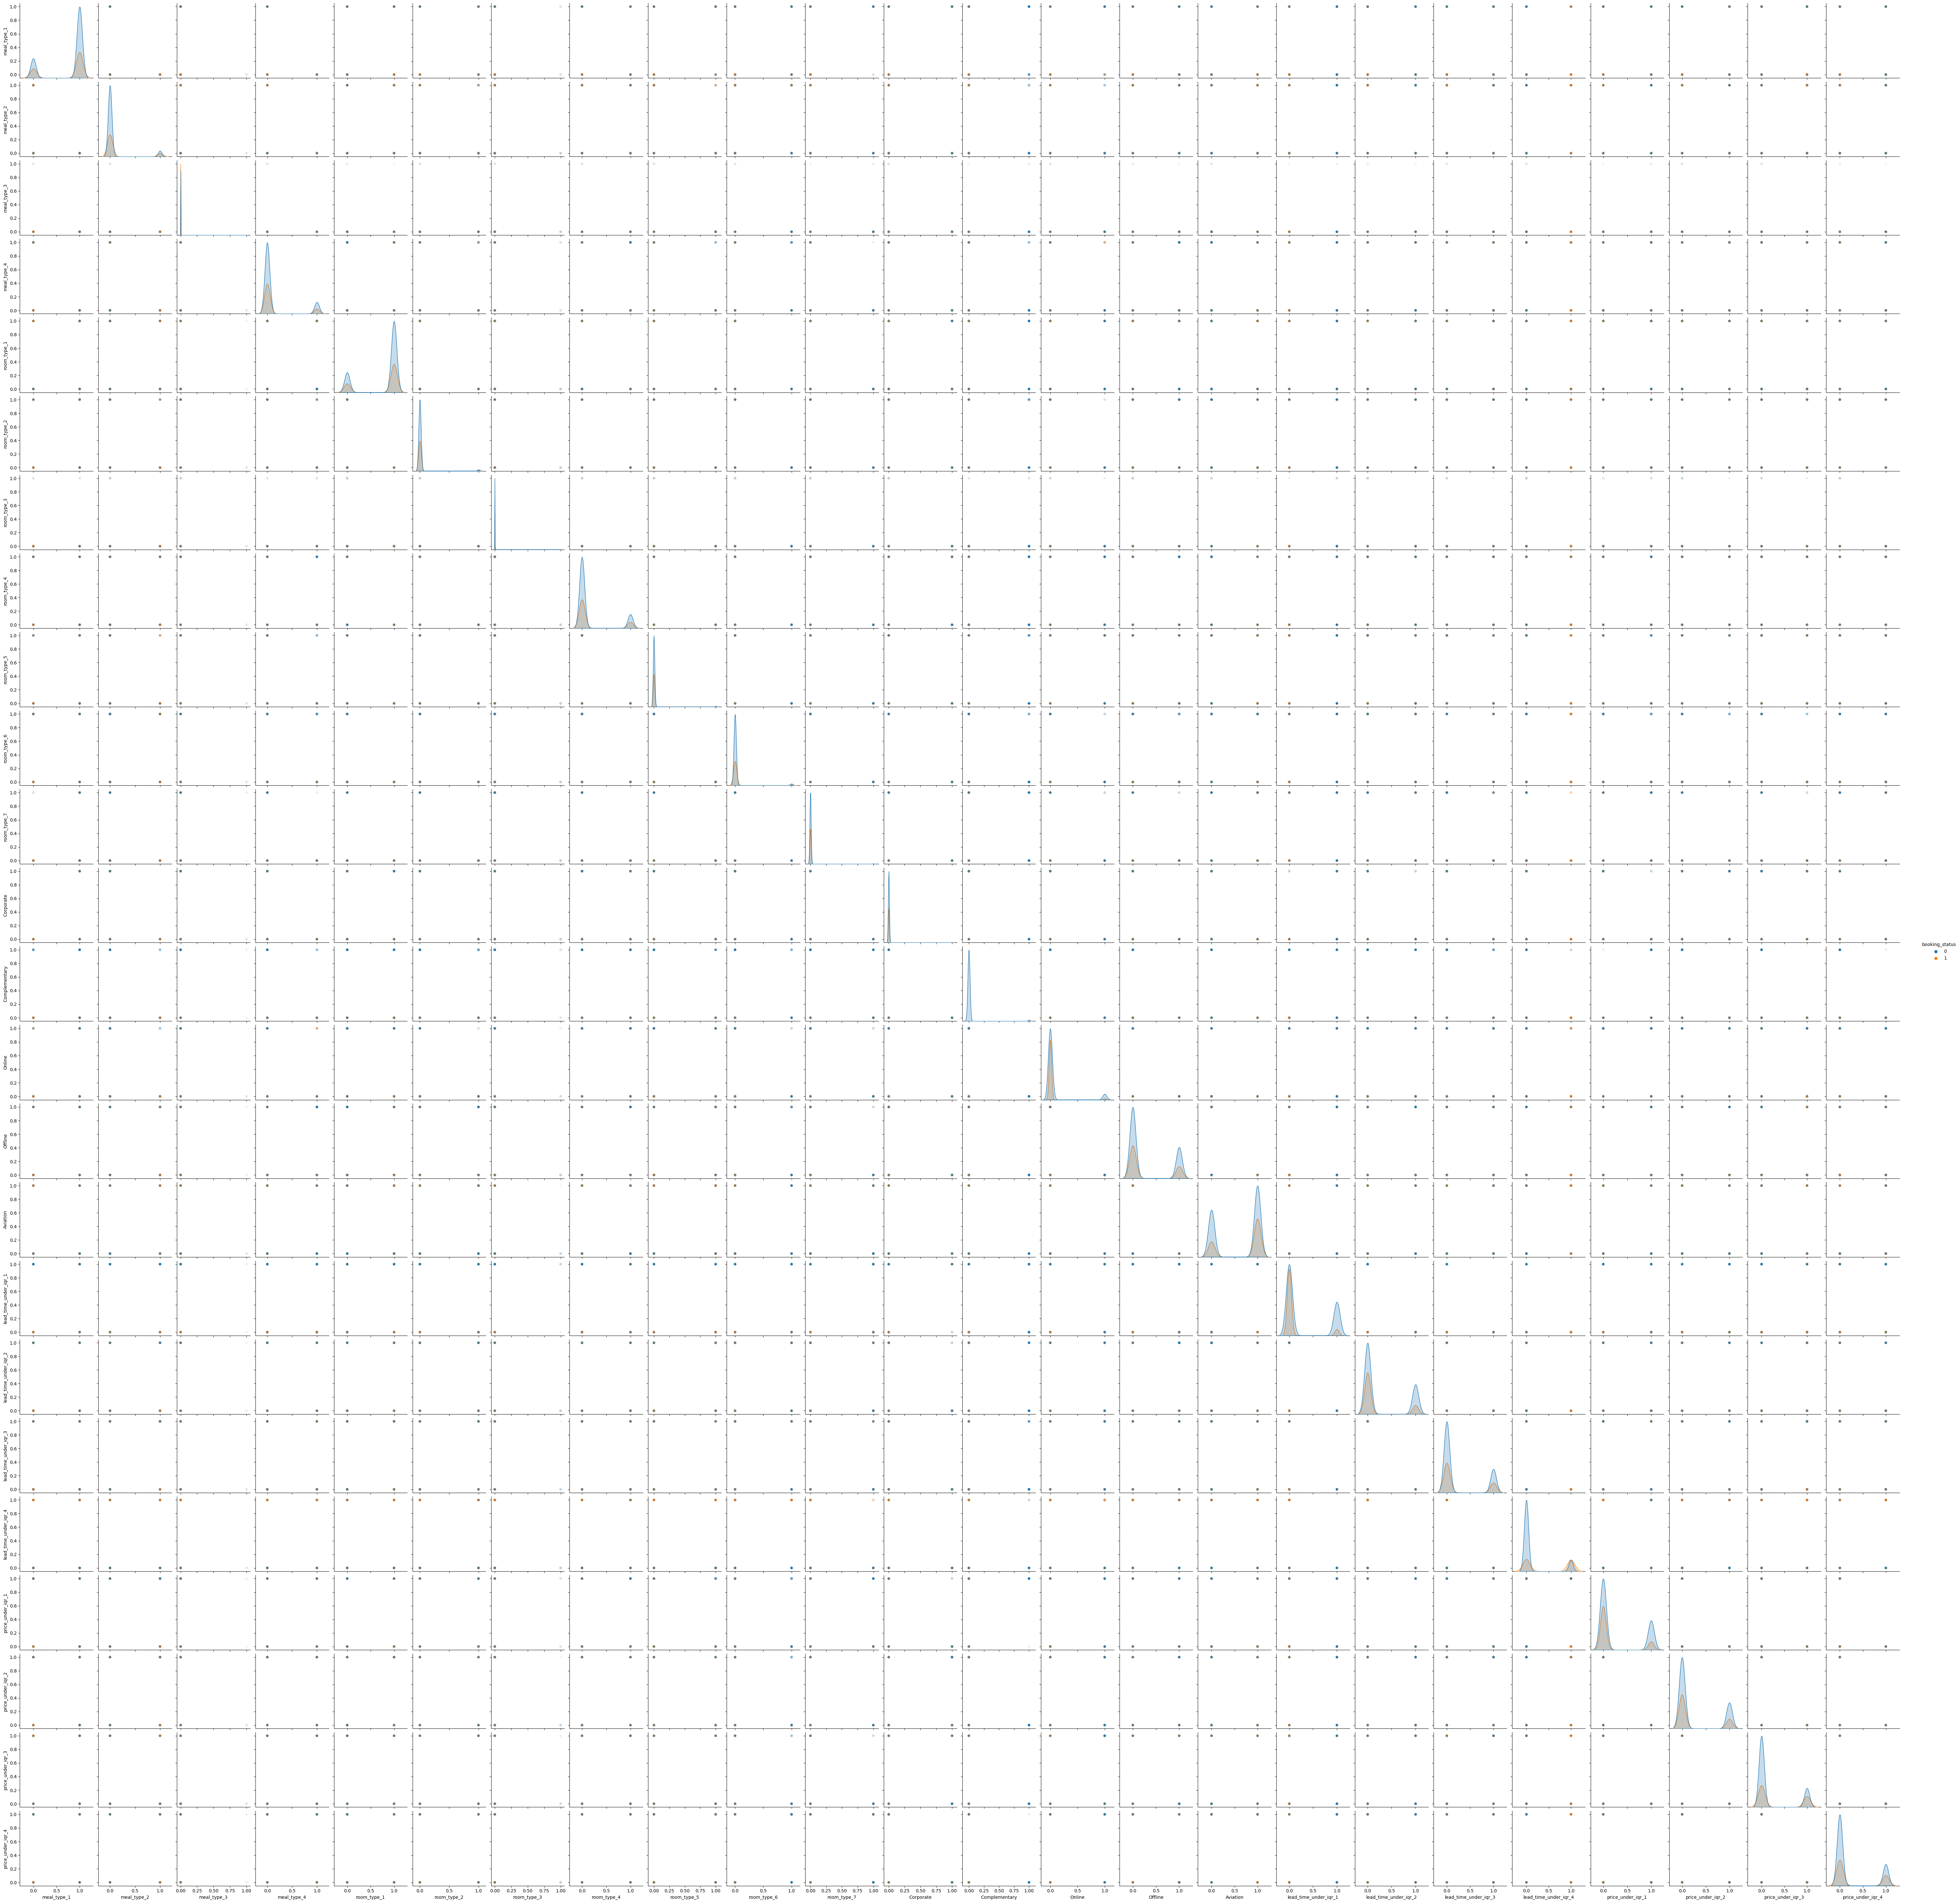

In [5]:
sb.pairplot( data=data, vars=('meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4'), plot_kws=dict(alpha=0.1), hue='booking_status' )